In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from HSIKE import HECCurveDSA

In [3]:
parameters = {
    "HSIKE" : [{
      "a": 4,
      "b": 3,
      "c": 10,
      "d": 108306943611133
    },{
      "a": 3,
      "b": 4,
      "c": 12,
      "d": 108306943611133
    },{
      "a": 4,
      "b": 4,
      "c": 10,
      "d": 108306943611133
    },{
      "a": 6,
      "b": 6,
      "c": 6,
      "d": 10830694361113356
    },{
      "a": 6,
      "b": 16,
      "c": 6,
      "d": 10830694361113356
    },{
      "a": 4,
      "b": 12,
      "c": 4,
      "d": 108306943611133
    },{
      "a": 4,
      "b": 12,
      "c": 18,
      "d": 108306943611133
    },{
      "a": 2,
      "b": 6,
      "c": 2,
      "d": 1083069436783356
    },{
      "a": 1,
      "b": 4,
      "c": 2,
      "d": 108306943611133
    },{
      "a": 8,
      "b": 4,
      "c": 2,
      "d": 10830694361113356
    }]
}

In [4]:
def HSIKE_wrapper(a, b, c, d):
    di = {}
    hsike = HECCurveDSA(a, b, c, d)

    start = time.time()
    pk, sk = hsike.KeyGen()
    end = time.time()
    key_gen_time = end-start

    pub_key = str(pk[0]) + str(pk[1])

    print("Secret Key Size: ", len(str(sk).encode('utf-8')))
    print("Public Key Size: ", len(pub_key.encode('utf-8')))
    print("Time Taken to Generate Keys", key_gen_time)

    di["SK Size"] = len(str(sk).encode('utf-8')) 
    di["PK Size"] = len(pub_key.encode('utf-8'))
    di["Key Gen Time"]  = key_gen_time

    start = time.time()
    R, s = hsike.sign(pk, sk)
    end = time.time()
    sign_time = end-start

    secret = str(s) + str(R[0]) + str(R[1])

    print("Time Taken to Sign", sign_time)
    print("Signature Size", len(secret.encode('utf-8')), " bytes")

    start = time.time()
    verify_true = hsike.verify(R, s, pk)
    end = time.time()
    verify_time = end-start

    print("Time Taken to Verify", verify_time)
    print("Is signature correct ?", verify_true)

    di["Sign Size"] = len(secret.encode('utf-8'))
    di["Sign Time"] = sign_time
    di["Verify Time"] = verify_time

    return di

In [8]:
val_arr = []

for param_set in parameters['HSIKE']:
    d = HSIKE_wrapper(param_set['a'], param_set['b'], param_set['c'], param_set['d'],)
    d["HSIKE Variants"] = "HSIKE-" + "a" + str(param_set['a']) + "b" + str(param_set['b']) + "c" + str(param_set['c'])
    val_arr.append(d)   

Secret Key Size:  77
Public Key Size:  51
Time Taken to Generate Keys 1.0317087173461914
Time Taken to Sign 6.8071112632751465
Signature Size 422  bytes
Time Taken to Verify 6.075437545776367
Is signature correct ? True
Secret Key Size:  77
Public Key Size:  51
Time Taken to Generate Keys 1.9163298606872559
Time Taken to Sign 12.784056663513184
Signature Size 423  bytes
Time Taken to Verify 6.012540578842163
Is signature correct ? True
Secret Key Size:  77
Public Key Size:  51
Time Taken to Generate Keys 1.222301959991455
Time Taken to Sign 5.797168970108032
Signature Size 423  bytes
Time Taken to Verify 5.684480667114258
Is signature correct ? True
Secret Key Size:  76
Public Key Size:  58
Time Taken to Generate Keys 1.1589329242706299
Time Taken to Sign 4.065119504928589
Signature Size 421  bytes
Time Taken to Verify 4.0323567390441895
Is signature correct ? True
Secret Key Size:  77
Public Key Size:  58
Time Taken to Generate Keys 1.2278144359588623
Time Taken to Sign 2.178009986877

In [9]:
df = pd.DataFrame(val_arr)
df.to_csv("result-hec-10-param.csv", encoding='utf-8', index=False)
df.head(14)

,SK Size,PK Size,Key Gen Time,Sign Size,Sign Time,Verify Time,Name of the curve
0,77,51,1.031709,422,6.807111,6.075438,HSIKE-a4b3c10
1,77,51,1.916330,423,12.784057,6.012541,HSIKE-a3b4c12
2,77,51,1.222302,423,5.797169,5.684481,HSIKE-a4b4c10
3,76,58,1.158933,421,4.065120,4.032357,HSIKE-a6b6c6
4,77,58,1.227814,423,2.178010,1.735429,HSIKE-a6b16c6
5,77,51,1.045659,423,15.533909,15.236086,HSIKE-a4b12c4
6,77,51,0.841225,423,17.397136,17.323298,HSIKE-a4b12c18
7,77,54,1.049346,423,3.551045,3.408733,HSIKE-a2b6c2
8,78,51,0.986331,423,21.819661,21.595669,HSIKE-a1b4c2
9,78,58,1.018371,423,2.864050,2.508281,HSIKE-a8b4c2


In [10]:
df = df.round(3) 
df

,SK Size,PK Size,Key Gen Time,Sign Size,Sign Time,Verify Time,Name of the curve
0,77,51,1.032,422,6.807,6.075,HSIKE-a4b3c10
1,77,51,1.916,423,12.784,6.013,HSIKE-a3b4c12
2,77,51,1.222,423,5.797,5.684,HSIKE-a4b4c10
3,76,58,1.159,421,4.065,4.032,HSIKE-a6b6c6
4,77,58,1.228,423,2.178,1.735,HSIKE-a6b16c6
5,77,51,1.046,423,15.534,15.236,HSIKE-a4b12c4
6,77,51,0.841,423,17.397,17.323,HSIKE-a4b12c18
7,77,54,1.049,423,3.551,3.409,HSIKE-a2b6c2
8,78,51,0.986,423,21.820,21.596,HSIKE-a1b4c2
9,78,58,1.018,423,2.864,2.508,HSIKE-a8b4c2


In [11]:
def plot_bar_multi_columns(data, x_col, y_cols, y_label):
    """
    Create a bar plot for multiple columns in a Pandas DataFrame with a gap between groups.

    Parameters:
    - data: The DataFrame containing the data to be plotted.
    - x_col: The name of the column to be used as the X-axis.
    - y_cols: A list of column names to be used as Y-axes.
    """
    # Extract X and Y data from the DataFrame
    x_data = data[x_col]
    y_data = data[y_cols]

    # Number of bars (Y-axes)
    num_y_axes = len(y_cols)

    # Set up the figure and axis with a larger figsize
    fig, ax = plt.subplots(figsize=(16, 10))

    # Width of each group of bars
    group_width = 1
    bar_width = (group_width / num_y_axes)-0.2

    # Define color options for bars
    colors = ['g', 'y', 'm', 'b', 'r', 'c', 'k']

    # Loop through each Y-axis and create a bar for each
    for i in range(num_y_axes):
        x_positions = [x + i * bar_width for x in range(len(x_data))]
        y_values = y_data[y_cols[i]]
        color = colors[i % len(colors)]  # Cycle through colors

        ax.bar(x_positions, y_values, width=bar_width, label=y_cols[i], color=color)

        # Add annotations to the bars
        for x, y in zip(x_positions, y_values):
            ax.text((x + bar_width / 2)-0.4, y, str(y), ha='center', va='bottom')

    # Set the X-axis labels and legend
    ax.set_xticks([(x + (group_width / 2))-0.5 for x in range(len(x_data))])
    ax.set_xticklabels(x_data, rotation=90, va='top')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_label)
    ax.legend()


In [27]:
df3 = df.rename(columns={'Name of the curve': 'HSIKE Variants'})

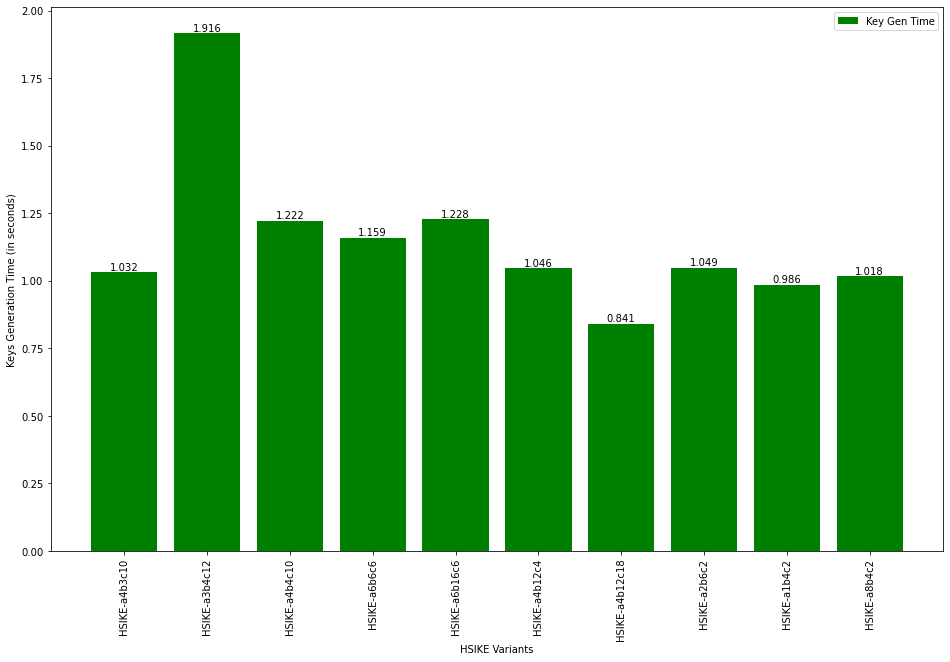

In [28]:
plot_bar_multi_columns(df3, 'HSIKE Variants', ["Key Gen Time"], "Keys Generation Time (in seconds)", 'hsv')

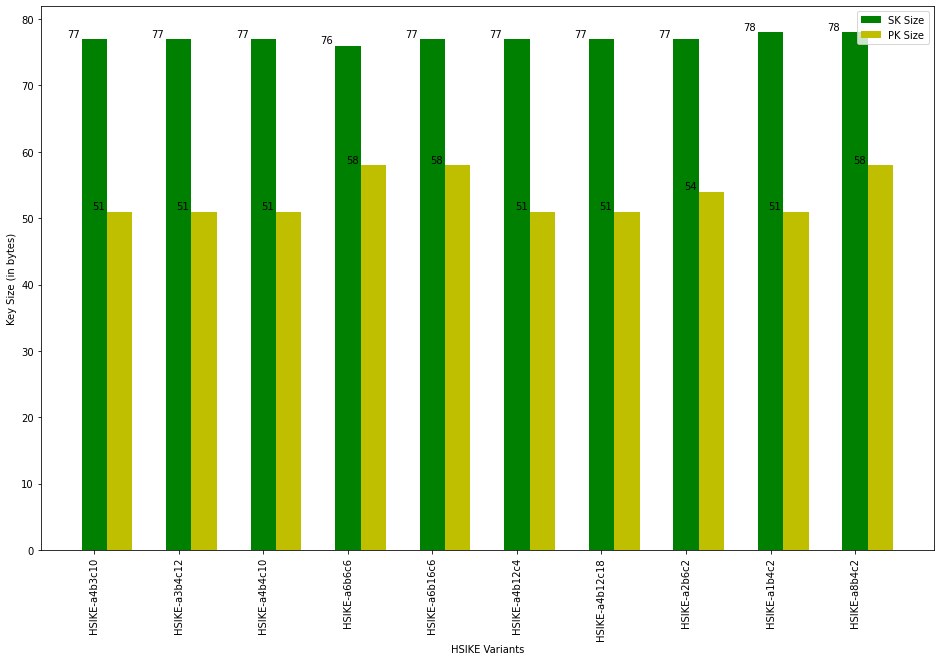

In [29]:
plot_bar_multi_columns(df3, 'HSIKE Variants', ["SK Size","PK Size"], "Key Size (in bytes)")

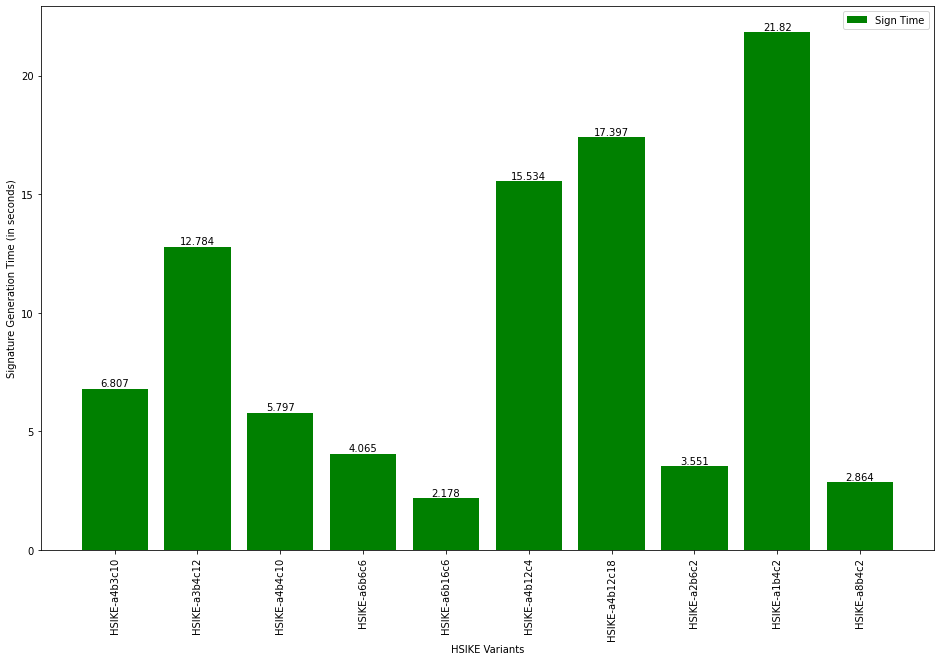

In [30]:
plot_bar_multi_columns(df3, 'HSIKE Variants', ["Sign Time"], "Signature Generation Time (in seconds)")

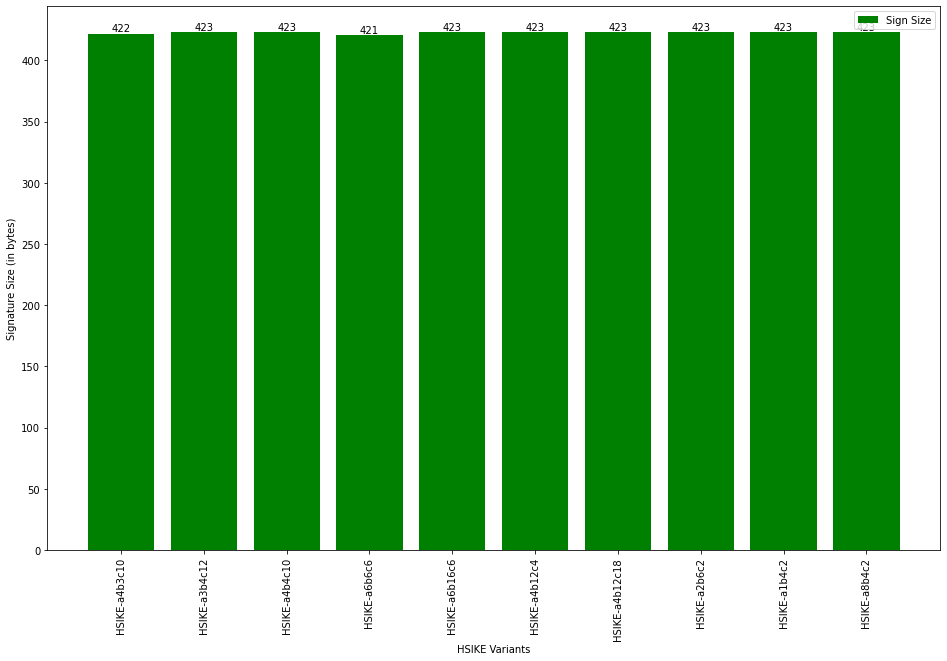

In [31]:
plot_bar_multi_columns(df3, 'HSIKE Variants', ["Sign Size"], "Signature Size (in bytes)")

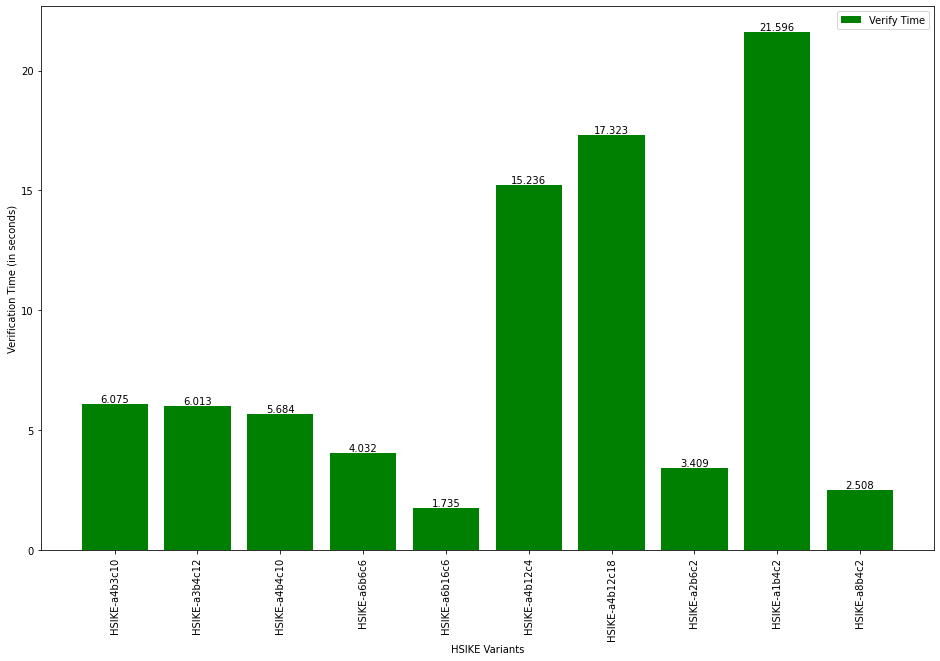

In [32]:
plot_bar_multi_columns(df3, 'HSIKE Variants', ["Verify Time"], "Verification Time (in seconds)")